In [1]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold, learning_curve, cross_validate, cross_val_predict, GridSearchCV
import warnings
from plotData import *
from linearRegCostFunction import *
from trainLinearReg import *
from learningCurve import *
from polyFeatures import *
from plotFit import *
from validationCurve import *

In [2]:
data=loadmat('water-level.mat')
Xtrain,ytrain,Xval,yval,Xtest,ytest=data['X'],data['y'],data['Xval'],data['yval'],data['Xtest'],data['ytest']
m=Xtrain.shape[0]

# Visualize data

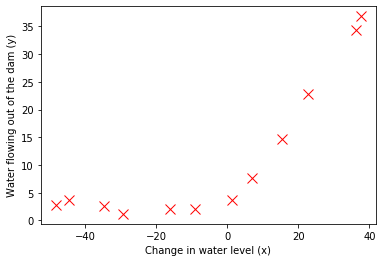

In [3]:
# Plot training data
plotData(Xtrain,ytrain,'rx',markersize=10,linewidth=1.5)

# Regularized linear regression

## Learning

In [4]:
theta=np.array([1,1])
J,grad=linearRegCostFunction(np.hstack((np.ones((m,1)),Xtrain)),ytrain,theta,1)
print('Cost at theta = [1 ; 1]: %f'%J)
print('Gradient at theta = [1 ; 1]:  [%f; %f]'%(grad[0],grad[1]))

Cost at theta = [1 ; 1]: 303.993192
Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744]


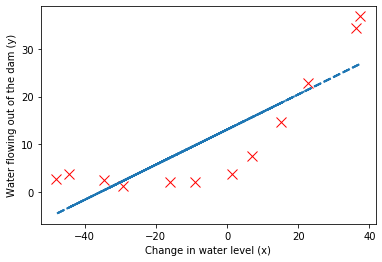

In [5]:
# Train linear regression with lambda = 0
Lambda=0
theta=trainLinearReg(np.hstack((np.ones((m,1)),Xtrain)),ytrain,Lambda)
# Plot fit over the data
plotData(Xtrain,ytrain,'rx',markersize=10,linewidth=1.5)
plotData(Xtrain,np.hstack((np.ones((m,1)),Xtrain))@theta,'--',linewidth=2)

## Bias-variance tradeoff: learning curves

Text(0.5, 1.0, 'Learning curve for linear regression')

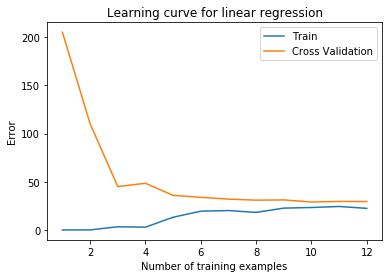

In [6]:
Lambda=0
error_train,error_val=learningCurve(np.hstack((np.ones((m,1)),Xtrain)),ytrain,np.hstack((np.ones((Xval.shape[0],1)),Xval)),yval,Lambda)
plotLearningCurve(range(1,m+1),error_train,error_val)
plt.title('Learning curve for linear regression')

In [7]:
def printErrors(n_it,error_train,error_val):
    print('# Training Examples\tTrain Error\tCross Validation Error')
    for i in range(1,n_it+1):
        print('\t%d\t\t%f\t%f'%(i,error_train[i-1],error_val[i-1]))

In [8]:
printErrors(m,error_train,error_val)

# Training Examples	Train Error	Cross Validation Error
	1		0.000000	205.121096
	2		0.000000	110.300366
	3		3.286595	45.010232
	4		2.842678	48.368911
	5		13.154049	35.865141
	6		19.443963	33.829957
	7		20.098522	31.970987
	8		18.172859	30.862446
	9		22.609405	31.135998
	10		23.261462	28.936207
	11		24.317250	29.551432
	12		22.373906	29.433818


# Polynomial linear regression

## Feature mapping 

In [9]:
p=8
# Map Xtrain onto Polynomial Features and Normalize
X_poly_train,mu,sigma=polyFeatureNormalize(Xtrain,p)
# Map Xval onto Polynomial Features and normalize (using mu and sigma)
X_poly_val,_,_=polyFeatureNormalize(Xval,p,mu=mu,sigma=sigma)
# Map Xtest onto Polynomial Features and normalize (using mu and sigma)
X_poly_test,_,_=polyFeatureNormalize(Xtest,p,mu=mu,sigma=sigma)
# Add ones
X_poly_train=np.hstack((np.ones((X_poly_train.shape[0],1)),X_poly_train))
X_poly_val=np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))
X_poly_test=np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))
print('Normalized Training Example 1: \n',X_poly_train[0,:])

Normalized Training Example 1: 
 [ 1.         -0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197
 -0.6171516   0.35983501 -0.53109126]


## Learning

(-23.812653870073596, 61.8238657125424)

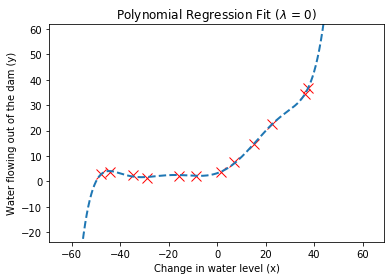

In [10]:
Lambda=0
theta=trainLinearReg(X_poly_train,ytrain,Lambda)
# Plot training data and fit
plotData(Xtrain,ytrain,'rx',markersize=10,linewidth=1.5)
plotFit(Xtrain,ytrain,mu,sigma,theta,p)
plt.gca().set_title('Polynomial Regression Fit ($\lambda$ = %.0f)'%Lambda)
y_min,y_max,y_sigma=np.min(ytrain),np.max(ytrain),np.std(ytrain)
plt.ylim(bottom=y_min-2*y_sigma,top=y_max+2*y_sigma)

## Learning curves

Text(0.5, 1.0, 'Polynomial Regression ($\\lambda$ = 0)')

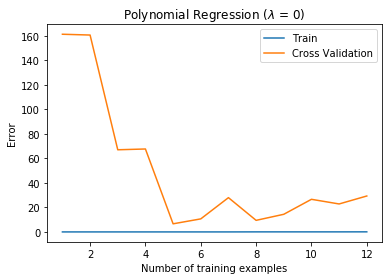

In [11]:
error_train_poly,error_val_poly=learningCurve(X_poly_train,ytrain,X_poly_val,yval,Lambda)
plotLearningCurve(range(1,m+1),error_train_poly,error_val_poly)
plt.gca().set_title('Polynomial Regression ($\lambda$ = %.0f)'%Lambda)

In [12]:
printErrors(m,error_train,error_val)

# Training Examples	Train Error	Cross Validation Error
	1		0.000000	205.121096
	2		0.000000	110.300366
	3		3.286595	45.010232
	4		2.842678	48.368911
	5		13.154049	35.865141
	6		19.443963	33.829957
	7		20.098522	31.970987
	8		18.172859	30.862446
	9		22.609405	31.135998
	10		23.261462	28.936207
	11		24.317250	29.551432
	12		22.373906	29.433818


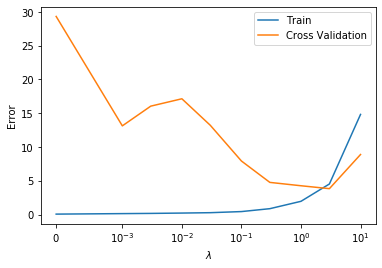

In [13]:
lambda_vec,error_train,error_val=validationCurve(X_poly_train,ytrain,X_poly_val,yval)
plotValidationCurve(lambda_vec,error_train,error_val)

In [14]:
print('lambda\tTrain Error\tCross Validation Error')
for i in range(len(lambda_vec)):
    print('%g\t%f\t%f'%(lambda_vec[i],error_train[i],error_val[i]))
print('The best value of lambda found by cross-validation is: %g'%(lambda_vec[np.argmin(error_val)]))

lambda	Train Error	Cross Validation Error
0	0.062732	29.334280
0.001	0.137005	13.131844
0.003	0.167314	16.051437
0.01	0.217961	17.143183
0.03	0.275158	13.215404
0.1	0.438673	7.926805
0.3	0.868156	4.760831
1	1.958695	4.263359
3	4.525105	3.832176
10	14.825808	8.889725
The best value of lambda found by cross-validation is: 3


## Performance

In [15]:
Lambda=3
theta=trainLinearReg(X_poly_train,ytrain,Lambda)
error_test_poly,_=linearRegCostFunction(X_poly_test,ytest,theta,0)
print('Performance={:.4f}'.format(error_test_poly))

Performance=3.5720


# Advanced optimization algorithms

## Learning curve

In [16]:
n_cv=5
kf=KFold(n_splits=n_cv)

Text(0.5, 1.0, 'Polynomial Regression ($\\lambda$ = 0)')

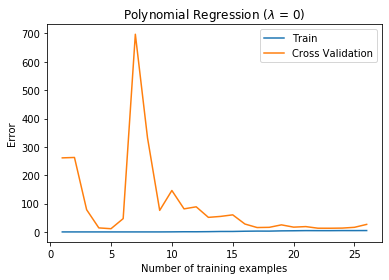

In [17]:
p=8
clf=Ridge(alpha=0)
X=np.vstack((Xtrain,Xval))
X_poly,_,_=polyFeatureNormalize(X,p)
train_len=[len(train) for train,_ in kf.split(X_poly)]
test_len=[len(test) for _,test in kf.split(X_poly)]
y=np.vstack((ytrain,yval))
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    train_sizes,train_scores,test_scores=learning_curve(clf,X_poly,y,train_sizes=range(1,27),cv=kf,scoring='neg_mean_squared_error')
mean_train_score=np.average(train_scores,axis=1,weights=train_len)
mean_test_score=np.average(test_scores,axis=1,weights=test_len)
plotLearningCurve(train_sizes,np.abs(mean_train_score),np.abs(mean_test_score))
plt.gca().set_title('Polynomial Regression ($\lambda$ = 0)')

## Cross validation

In [18]:
p=4
X_poly,_,_=polyFeatureNormalize(X,p)
train_len=[len(train) for train,_ in kf.split(X_poly)]
test_len=[len(test) for _,test in kf.split(X_poly)]
X_poly_test,_,_=polyFeatureNormalize(Xtest,p)
lambdas=[0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]

### sklearn: cross_validate

#### Select model

Text(0.5, 1.0, 'cross_validate\nBest $\\lambda=0.3$')

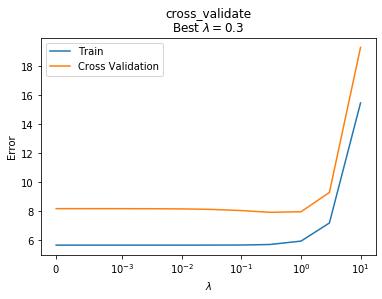

In [19]:
mean_train_score_cv=[]
mean_test_score_cv=[]
estimators=[]
for l in lambdas:
    clf=Ridge(alpha=l)
    scores=cross_validate(clf,X_poly,y,scoring='neg_mean_squared_error',cv=kf,return_train_score=True,return_estimator=True)
    # Take cross-validation mean train/test scores
    mean_train_score_cv.append(np.abs(np.average(scores['train_score'],weights=train_len)))
    mean_test_score_cv.append(np.abs(np.average(scores['test_score'],weights=test_len)))
    # Take estimators which give higest cross-validation test score (i.e. smallest error)
    estimators.append(scores['estimator'][np.argmax(np.array(scores['test_score']))])
plotValidationCurve(lambdas,mean_train_score_cv,mean_test_score_cv)
bestidx_cv=np.argmin(mean_test_score_cv)
bestLambda_cv=lambdas[bestidx_cv]
bestEstimator_cv=estimators[bestidx_cv]
plt.title('cross_validate\nBest 'r'$\lambda={}$'.format(lambdas[bestidx_cv]))

#### Predict the response for all models and visualize the results

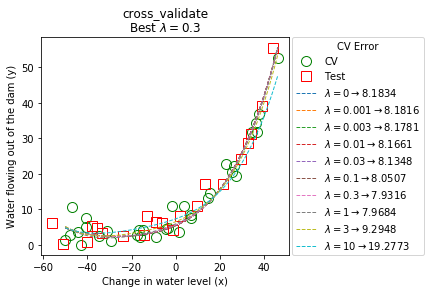

In [20]:
plotData(X,y,'go',markersize=10,linewidth=1.5,mfc='None')
plotData(Xtest,ytest,'rs',markersize=10,linewidth=1.5,mfc='None')
x=np.arange(np.min(X),np.max(X),0.05)[:,np.newaxis]
for estimator in estimators:
    plt.plot(x,estimator.predict(polyFeatureNormalize(x,p)[0]),'--',linewidth=1)
plt.title('cross_validate\nBest 'r'$\lambda={}$'.format(bestLambda_cv))
plt.gcf().legend(['CV','Test']+[r'$\lambda={}\rightarrow{:.4f}$'.format(l,mean_test_score_cv[i]) for i,l in enumerate(lambdas)],title='CV Error',loc='center right',borderaxespad=0.1)
plt.subplots_adjust(right=0.70)

#### Evaluate model performance

In [21]:
def plotPred(y,pred):
    plt.plot(y,pred,'o')
    plt.plot([y.min(),y.max()],[y.min(),y.max()])
    plt.ylabel('Predicted')
    plt.xlabel('Measured')

Text(0.5, 1.0, 'cross_validate\nCross-validation prediction\n$\\lambda=0.3$\nMSE=6.2309')

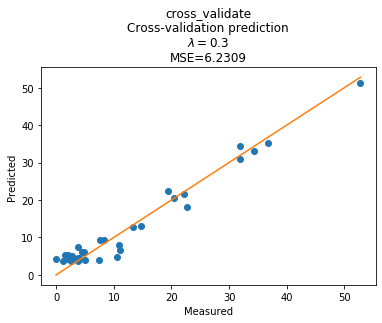

In [22]:
pred=bestEstimator_cv.predict(X_poly)
plotPred(y,pred)
plt.title('cross_validate\nCross-validation prediction\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cv,MSE(pred,y)))

Text(0.5, 1.0, 'cross_validate\nPerformance (test set)\n$\\lambda=0.3$\nMSE=12.8012')

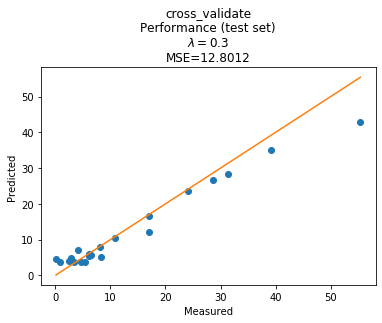

In [23]:
pred=bestEstimator_cv.predict(X_poly_test)
plotPred(ytest,pred)
plt.title('cross_validate\nPerformance (test set)\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cv,MSE(pred,ytest)))

Text(0.5, 1.0, 'cross_validate (with refit)\nCross-validation prediction\n$\\lambda=0.3$\nMSE=5.9234')

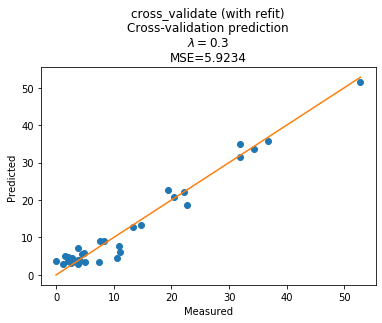

In [24]:
# Refit using selected model before evaluating performance
clf=Ridge(alpha=bestLambda_cv)
bestEstimator_cvrefit=clf.fit(X_poly,y)
pred=bestEstimator_cvrefit.predict(X_poly)
plotPred(y,pred)
plt.title('cross_validate (with refit)\nCross-validation prediction\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cv,MSE(pred,y)))

Text(0.5, 1.0, 'cross_validate (with refit)\nPerformance (test set)\n$\\lambda=0.3$\nMSE=11.7199')

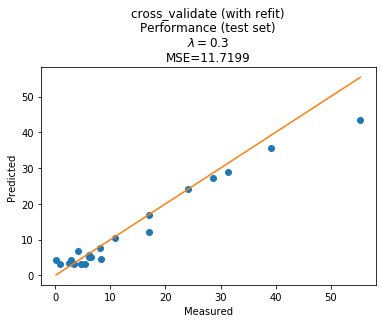

In [25]:
pred=bestEstimator_cvrefit.predict(X_poly_test)
plotPred(ytest,pred)
plt.title('cross_validate (with refit)\nPerformance (test set)\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cv,MSE(pred,ytest)))

### sklearn: cross_val_predict

#### Select model

In [26]:
preds=[]
mean_test_score_cvp=[]
for i,l in enumerate(lambdas):
    # It is the same as:
    # clf=Ridge(alpha=l)
    # preds.append(cross_val_predict(clf,X_poly,y,cv=kf))
    preds.append(cross_val_predict(estimators[i],X_poly,y,cv=kf))
    score=MSE(preds[i],y)
    mean_test_score_cvp.append(score)
    print('lambda={} -> {:.4f}'.format(l,score))
bestidx_cvp=np.argmin(mean_test_score_cvp)
bestLambda_cvp=lambdas[bestidx_cvp]
print('The best value of lambda found by cross-validation is: %g'%(bestLambda_cvp))

lambda=0 -> 8.1834
lambda=0.001 -> 8.1816
lambda=0.003 -> 8.1781
lambda=0.01 -> 8.1661
lambda=0.03 -> 8.1348
lambda=0.1 -> 8.0507
lambda=0.3 -> 7.9316
lambda=1 -> 7.9684
lambda=3 -> 9.2948
lambda=10 -> 19.2773
The best value of lambda found by cross-validation is: 0.3


#### Evaluate model performance

Text(0.5, 1.0, 'cross_val_predict\nCross-validation prediction\n$\\lambda=0.3$\nMSE=7.9316')

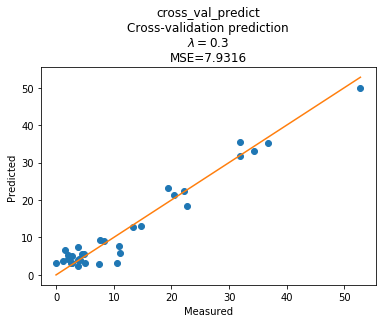

In [27]:
pred=preds[bestidx_cvp]
plotPred(y,pred)
plt.title('cross_val_predict\nCross-validation prediction\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cvp,MSE(pred,y)))

Text(0.5, 1.0, 'cross_val_predict (with refit)\nCross-validation prediction\n$\\lambda=0.3$\nMSE=5.9234')

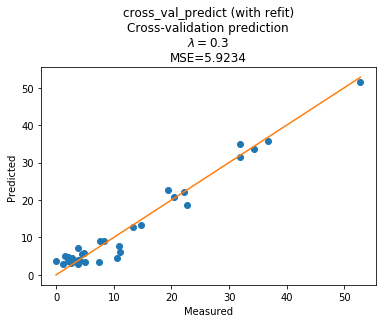

In [28]:
# Refit using selected model before evaluating performance
clf=Ridge(alpha=bestLambda_cvp)
bestEstimator_cvprefit=clf.fit(X_poly,y)
pred=bestEstimator_cvprefit.predict(X_poly)
plotPred(y,pred)
plt.title('cross_val_predict (with refit)\nCross-validation prediction\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cvp,MSE(pred,y)))

Text(0.5, 1.0, 'cross_val_predict (with refit)\nPerformance (test set)\n$\\lambda=0.3$\nMSE=11.7199')

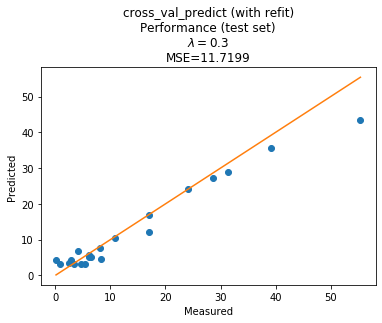

In [29]:
pred=bestEstimator_cvprefit.predict(X_poly_test)
plotPred(ytest,pred)
plt.title('cross_val_predict (with refit)\nPerformance (test set)\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_cvp,MSE(pred,ytest)))

### sklearn: GridSearchCV

#### Select model

In [30]:
# gridsearch for hyperparameters optimization and prediction
params={
    'alpha':lambdas
}
clf=GridSearchCV(Ridge(),params,scoring='neg_mean_squared_error',cv=kf,return_train_score=True)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    clf.fit(X_poly,y)
results=clf.cv_results_
bestEstimator_GS=clf.best_estimator_
results

{'mean_fit_time': array([0.00019941, 0.00059843, 0.00019946, 0.00039897, 0.00079789,
        0.00039897, 0.00059829, 0.00119681, 0.00019946, 0.00059843]),
 'std_fit_time': array([0.00039883, 0.00048862, 0.00039892, 0.00048864, 0.00039895,
        0.00048864, 0.0004885 , 0.00146582, 0.00039892, 0.00048862]),
 'mean_score_time': array([0.00059838, 0.00019946, 0.        , 0.00019946, 0.00019951,
        0.00019941, 0.00019946, 0.00039892, 0.00039883, 0.00019951]),
 'std_score_time': array([0.00048858, 0.00039892, 0.        , 0.00039892, 0.00039902,
        0.00039883, 0.00039892, 0.00048858, 0.00048846, 0.00039902]),
 'param_alpha': masked_array(data=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0},
  {'alpha': 0.001},
  {'alpha': 0.003},
  {'alpha': 0.01},
  {'alpha': 0.03},
  {'alpha': 0.1},
  {'alph

Text(0.5, 1.0, 'GridSearchCV\nBest $\\lambda=0.3$')

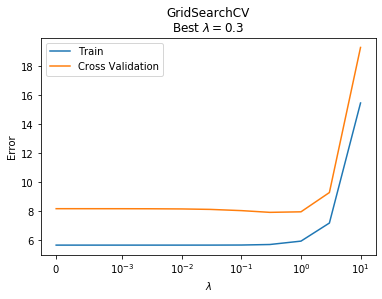

In [31]:
mean_train_score_GS=np.abs(results['mean_train_score'])
mean_test_score_GS=np.abs(results['mean_test_score'])
plotValidationCurve(lambdas,mean_train_score_GS,mean_test_score_GS)
bestLambda_GS=clf.best_params_['alpha']
plt.title('GridSearchCV\nBest 'r'$\lambda={}$'.format(bestLambda_GS))

#### Evaluate model performance

Text(0.5, 1.0, 'GridSearchCV\nCross-validation prediction\n$\\lambda=0.3$\nMSE=5.9234')

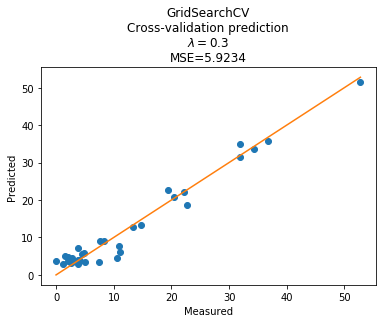

In [32]:
pred=bestEstimator_GS.predict(X_poly)
plotPred(y,pred)
plt.title('GridSearchCV\nCross-validation prediction\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_GS,MSE(pred,y)))

Text(0.5, 1.0, 'GridSearchCV\nPerformance (test set)\n$\\lambda=0.3$\nMSE=11.7199')

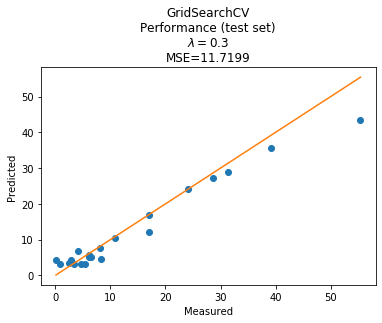

In [33]:
pred=bestEstimator_GS.predict(X_poly_test)
plotPred(ytest,pred)
plt.title('GridSearchCV\nPerformance (test set)\n'r'$\lambda={}$''\nMSE={:.4f}'.format(bestLambda_GS,MSE(pred,ytest)))

### CV loss comparison between sklearn model selection algorithms

In [34]:
# print CV losses, i.e. for each lambda, loss weighted mean over splits
print('Cross-validation scores (MSE):\nlambda\tcross_validate\tcross_val_predict\tGridSearchCV')
for i in range(len(lambdas)):
    print('{}\t{:.4f}\t\t{:.4f}\t\t\t{:.4f}'.format(lambdas[i],mean_test_score_cv[i],mean_test_score_cvp[i],mean_test_score_GS[i]))

Cross-validation scores (MSE):
lambda	cross_validate	cross_val_predict	GridSearchCV
0	8.1834		8.1834			8.1834
0.001	8.1816		8.1816			8.1816
0.003	8.1781		8.1781			8.1781
0.01	8.1661		8.1661			8.1661
0.03	8.1348		8.1348			8.1348
0.1	8.0507		8.0507			8.0507
0.3	7.9316		7.9316			7.9316
1	7.9684		7.9684			7.9684
3	9.2948		9.2948			9.2948
10	19.2773		19.2773			19.2773
